<a href="https://colab.research.google.com/github/qcbegin/DSME6635-S24/blob/main/problem_sets/PS1_Bias_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 1 - Bias-Variance Trade-off

### DSME 6635: Artificial Intelligence for Business Research (Spring 2024)

### Due at 12:30PM, Tuesday, January 16, 2024

Please first copy the CoLab file onto your own Google Drive. Finish the questions below and submit the **CoLab link** of your solutions in [this Google Sheet](https://docs.google.com/spreadsheets/d/1nOE-saTptG73WMCONDB1Z3pt-jHhmDA_1OHpQVHqQ1M/edit#gid=517617149). The total achievable points are 8 for this problem set. Please name you solution as

- `Member1LastName_Member1FirstName-Member2LastName_Member2FirstName_PS1.ipynb` (e.g., `Cao_Leo-Zhang_Renyu_PS1.ipynb`)

The bias-variance trade-off is the most important trade-off in supervised learning. This exercise is designed to help you better understand this trade-off. You will work with the Boston Housing data set which we used in class demonstrations. You will be reading in this data set, split the data set into training and testing samples, and then fit polynomial functions for this data set.

## 1. Read Data

Create a function `read_data(degree=1)` which will read in the data and return four variables, X1, Y1 and X2, Y2. You need to first split the data into two datasets: the top 80% (you need to round up the splitting number for the top 80%. i.e., if there are 11 rows in the data, the top 80% should be the first 9 rows) will be the training data and the remaining 20% will be testing data. X1 and Y1 represent the features (`indus`, `rm`, and `lstat`) and labels (`medv`). Therefore, Y1 will be a vector and X1 is a matrix whose width depends on degree. If degree is 1, X1 has width 4 (3 features + the constant). Last, X2 and Y2 are polynomials of the features and `medv` for the testing data. In order to generate the polynomial of features, you can use [the function from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

In [ ]:
poly = PolyF(degree=2)
poly.fit_transform(np.array([[1,2,3],[2,3,4]]))
# degree 0, degree 1, x1^2 x1x2 x1x3 x2^2 x2x3 x3^2

In [1]:
# Import necessary packages.

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures as PolyF
from sklearn.linear_model import LinearRegression as LinReg

# Load the data from our course GitHub repo.

url = "https://raw.githubusercontent.com/rphilipzhang/AI-PhD-S24/main/Data/BostonHousing.csv"
df_BH = pd.read_csv(url)


def read_data(degree=1,df=df_BH):
    """
    This function will read in the data frame and return training and
    testing samples.
    Input:
        degree: the highest degree of polynomials.
    Output:
        X1: training features
        Y1: training labels
        X2: testing features
        Y2: testing labels
        (Note: the column sequence of X1 and X2 should follow the same sequence as the column sequence in the original dataframe)
    """
    X1 = Y1 = X2 = Y2 = np.array([])

    ### BEGIN SOLUTION
    
    # check the inputted dataframe before proceeding
    df_size = len(df)
    fs = ['indus','rm','lstat','medv']
    if df_size == 0:
        raise ValueError("The inputted dataframe is empty.")
    
    split = int(np.ceil(df_size*0.8))
    if split == df_size:
        raise ValueError("The inputted dataframe is too small to be split into training and testing sets.")
    
    if not set(fs).issubset(df.columns):
        raise ValueError("The inputted dataframe does not have the correct columns.")
    
    ## Without shuffle
    X = df[fs[:3]].values
    Y = df[fs[-1]].values
    ## With shuffle
    # perm = np.random.permutation(df_size)
    # X = df[fs[:3]].values[perm]
    # Y = df[fs[-1]].values[perm]

    X1 = X[:split]
    Y1 = Y[:split]
    X2 = X[split:]
    Y2 = Y[split:]

    # create a PolynomialFeatures object with the degree specified
    poly = PolyF(degree=degree)
    X1 = poly.fit_transform(X1)
    X2 = poly.fit_transform(X2)

    ### END SOLUTION

    return X1, Y1, X2, Y2

In [2]:
# Unit tests for the read_data function with degree=1.

X1, Y1, X2, Y2 = read_data(degree=1,df=df_BH)
assert X1.shape == (405, 4)
assert X2.shape == (101, 4)
assert Y1.size == 405
assert Y2.size == 101

In [3]:
# Unit tests for the read_data function with degree=2.

X1, Y1, X2, Y2 = read_data(degree=2,df=df_BH)
assert X1.shape == (405, 10)
assert X2.shape == (101, 10)
assert Y1.size == 405
assert Y2.size == 101

## 2. Evaluate the Training and Testing Errors

Create a function `generate_error(X1, Y1, X2, Y2)` which trains a linear regression model of Y1 on X1. It will then output the `insample_mean_squared_error` and `outofsample_mean_squared_error`. `insample_mean_squared_error` is based on `Y1`, and `outofsample_mean_squared_error` is based on `Y2`. You can use the sklearn function to run [linear regression predictors](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [4]:
def generate_mse(X1, Y1, X2, Y2):
    """
    This function takes in the training and testing features and labels,
    it will return the in_sample and out_of_sample errors of linear regression.
    Input:
        X1, Y1: features and labels for training samples
        X2, Y2: features and labels for testing samples
    Ouput:
        in_sample_mse, out_of_sample_mse: in-sample and out-of-sample mean squared error of the model
    """
    in_sample_mse = out_of_sample_mse = 0

    ### BEGIN SOLUTION
    # check if the number of features and labels match
    if X1.shape[0] != Y1.size:
        raise ValueError("The number of training features and labels do not match.")
    if X2.shape[0] != Y2.size:
        raise ValueError("The number of testing features and labels do not match.")

    lin = LinReg()
    lin.fit(X1,Y1)
    in_sample_mse = np.mean((lin.predict(X1)-Y1)**2)
    out_of_sample_mse = np.mean((lin.predict(X2)-Y2)**2)

    ### END SOLUTION

    return in_sample_mse, out_of_sample_mse

In [5]:
# Unit tests for the read_data function with degree=1.

X1, Y1, X2, Y2 = read_data(degree=1,df=df_BH)
in_sample_mse, out_of_sample_mse = generate_mse(X1, Y1, X2, Y2)
assert np.isclose(in_sample_mse, 30.04818814902604)
assert np.isclose(out_of_sample_mse, 39.459195874785145)

In [6]:
# Unit tests for the read_data function with degree=2.

X1, Y1, X2, Y2 = read_data(degree=2,df=df_BH)
in_sample_mse, out_of_sample_mse = generate_mse(X1, Y1, X2, Y2)
assert np.isclose(in_sample_mse, 16.18744994075758)
assert np.isclose(out_of_sample_mse, 18.541655356264993)

## 3. Generate a Vector of Errors

Create a function `generate_error_vectors(degrees=[])` which generates two lists representing the insample_mse and outofsample_mse for each polynomial degree defined in the input. For example, if the input is [1,3,5,8], then the function will return two lists of length 4 representing the in-sample and out-of-sample mean squared error corresponding to that the polynomial degree is 1, 3, 5 and 8.

In [7]:
def generate_error_vectors(degrees):
    """
    This function takes a list of hyperparameteres of degrees and returns
    the in-sample and out-of-sample errors of each hyperparameter.
    Input:
        degress: a list of higest degrees of functions to fit
    Output:
        in_sample_mses, out_of_sample_mses: the in-sample and out-of-sample
        mean squared error corresponding to each hyper-parameter in the input
        list.
    """

    in_sample_mses = []
    out_of_sample_mses = []

    ### BEGIN SOLUTION
    for i in degrees:
        X1, Y1, X2, Y2 = read_data(degree=i, df=df_BH)
        in_sample_mse, out_of_sample_mse = generate_mse(X1, Y1, X2, Y2)
        in_sample_mses.append(in_sample_mse)
        out_of_sample_mses.append(out_of_sample_mse)
    ### END SOLUTION

    return in_sample_mses, out_of_sample_mses

In [8]:
# Unit tests for the function generate_error_vectors()

in_sample_mses, out_of_sample_mses = generate_error_vectors(list(range(1, 6)))
assert len(in_sample_mses) == 5
assert len(out_of_sample_mses) == 5
assert np.isclose(in_sample_mses[3], 12.163525946822281)
assert np.isclose(out_of_sample_mses[3], 20.638652953787005)

What is the optimal degree? Please discuss how your generated error vectors relate to the bias-variance tradeoff.

### Provide your answers here.

In [9]:
# find the best degree of polynomial, that is, the degree that minimizes the out-of-sample error
degrees = list(range(1, 6))
in_sample_mses, out_of_sample_mses = generate_error_vectors(degrees)
best_degree = degrees[np.argmin(out_of_sample_mses)]
print("The best degree of polynomial is: ", best_degree)

The best degree of polynomial is:  3


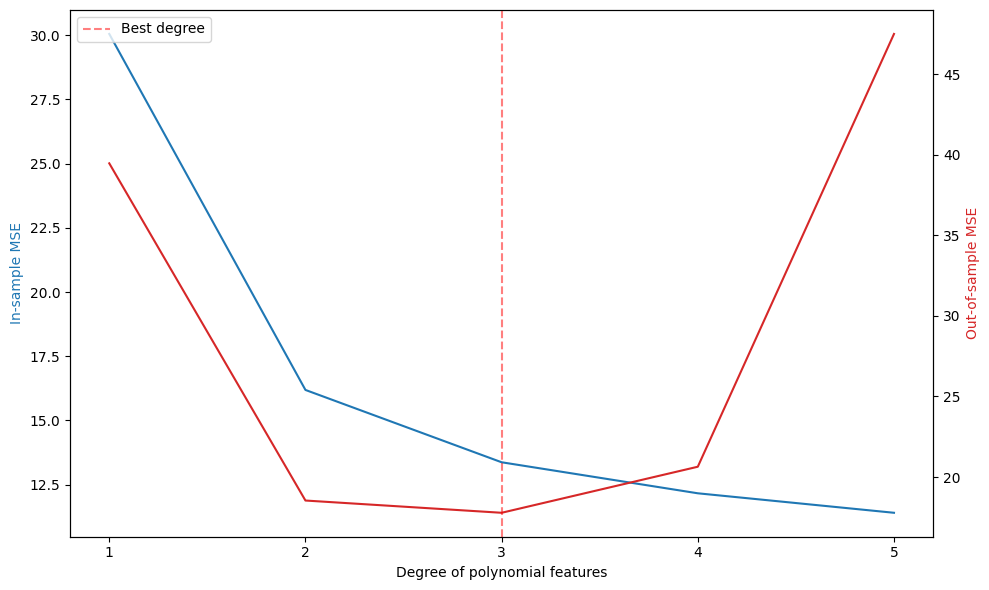

In [10]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
fig.set_size_inches(10, 6)
ax1.set_xlabel("Degree of polynomial features")
ax1.set_ylabel("In-sample MSE", color='tab:blue')
ax1.plot(degrees, in_sample_mses, color='tab:blue')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel("Out-of-sample MSE", color='tab:red')
ax2.plot(degrees, out_of_sample_mses, color = 'tab:red')
ax2.tick_params(axis='y')
plt.axvline(x=best_degree, color="red", linestyle="--", label="Best degree", alpha=0.5)
fig.tight_layout()
plt.xticks(degrees)
plt.legend()
plt.show()

**Explanation:**

The above graph shows the trade-off between variance and bias, where bias can be proxied by in-sample MSE and variance proxied by out-sample MSE. When we increase the polynominal degree of our selected features, the model become more complex and can better fit our provided training set, leading to lower in-sample MSE. However, at the same time, we see highly complex models (models whose degree > 3) don't perform as well as simpler models in our testing dataset (with higher out-sample MSE). At some point, the out-sample MSE starts to increase rapidly. This could be an indicator that performances of models with higher degree (less bias) are unstable across different sample sets (high variance, more sensitive to noises existed in different sample sets). The trade-off is that ideal model should balances both errors, accurately representing the training data while generalizing well to unseen data.

## End of Problem Set 1.